In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
vel=np.loadtxt('vel.txt')/1000

In [5]:
vel=(np.linspace(-123483,17499.24188,172)//100)/10

In [8]:
a=np.loadtxt('21cmsurvey.txt')

In [9]:
spgr=a[1:]

In [ ]:
plt.plot(vel,spgr[:,0])

In [10]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [15]:
x=vel
y=spgr[:,0]

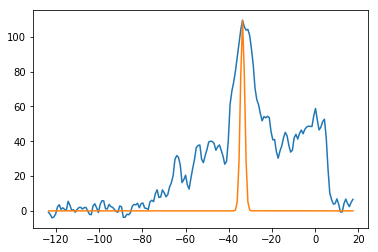

In [18]:
g1=gauss(x, y.max(),x[np.argmax(y)],1)
hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')

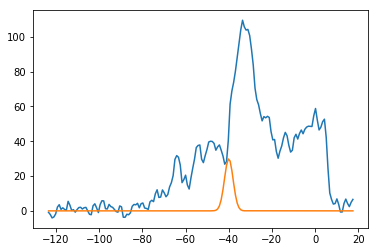

In [19]:
g1=gauss(x, 30,-40,2)

hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')

In [ ]:
np.trapz(hist_fit, dx=dv)

In [ ]:
from lmfit.models import ExponentialModel, GaussianModel

In [ ]:
gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-70, min=-80, max=-60)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_amplitude'].set(value=1000, min=20,max=3000
                         
#gauss2 = GaussianModel(prefix='g2_')
#pars.update(gauss2.make_params())                        

In [ ]:
mod = gauss1

In [ ]:
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')


axes[1].legend(loc='best')